In [1]:
import numpy as np
from matplotlib import pyplot as plt 
from matplotlib import colors as clr
from matplotlib.lines import Line2D
import copy
import random
import time

In [2]:
def initialise_state(N): #N is the grid dimension (in the above example, N=4)
    '''
    Author: Siddharth Bachoti
    ~Function Description~
    '''
    grid = np.ones((N,N,2),dtype=int)
    
    return np.array(grid)


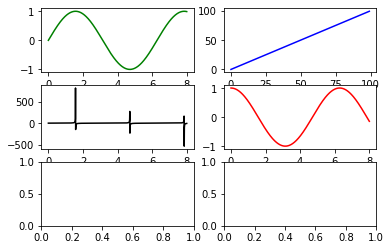

In [3]:

fig, ax = plt.subplots(3, 2)
x = np.linspace(0, 8, 1000)

ax[0, 0].plot(x, np.sin(x), 'g') #row=0, col=0
ax[1, 0].plot(x, np.tan(x), 'k') #row=1, col=0
ax[0, 1].plot(range(100), 'b') #row=0, col=1
ax[1, 1].plot(x, np.cos(x), 'r') #row=1, col=1
plt.show()

In [4]:
def plot_vector(p1,p2,num):
    '''
    Author: Siddharth Chaini
    ~Function Description~
    '''
    if num>4:
        w = 0.12/num
        h=0.9/num
    else:
        w = 0.03
        h=0.2
    p1 = np.array(p1)
    p2 = np.array(p2)
    dp = p2-p1
    dx = dp[0]
    dy = dp[1]

    plt.arrow(p1[0], p1[1],
                 dx / 2, dy / 2,
                 width=w, head_width=h,
                 facecolor="k",
                 zorder=0)

    plt.arrow(p1[0] + dx / 2,
                 p1[1] + dy / 2,
                 dx / 2, dy / 2,
                 width=w, head_width=0,
                 facecolor="k",
                 zorder=0)

def plot_vector_old(p1,p2):
    '''
    DEPRECATED: As of 5th June 2020.
    Author: Siddharth Chaini
    ~Function Description~
    '''
    p1 = np.array(p1)
    p2 = np.array(p2)
    dp = p2-p1
    plt.quiver(p1[0], p1[1], dp[0], dp[1],angles='xy', scale_units='xy', scale=1, headwidth = 5, headlength = 7)

def get_coord_list(arr):
    '''
    Author: Siddharth Chaini
    ~Function Description~
    '''
    coord_list=[]
    num = len(arr)
    for i in range(num):
        temp_coord = []
        for j in range(num):
            current_elems = arr[i][j]
            xpt = (num-1)-i
            ypt = j
            temp_coord.append((xpt,ypt))
        coord_list.append(temp_coord)
    return coord_list

def visualise_2d_model(arr,savefig=False,savename=".temp",show=True):
    '''
    Author: Siddharth Chaini
    ~Function Description~
    '''
    num = len(arr)
    if num<4:
        mksize = 35/num 
    else:
        mksize=(35/num)+0.5
    plt.axes().set_aspect('equal')
    coord_list = get_coord_list(arr)
    for i in range(num):
        for j in range(num):
            current_up_state = arr[i][j][0]
            current_right_state = arr[i][j][1]
            x_current = coord_list[i][j][1]
            y_current = coord_list[i][j][0]

            lower_neighbour_up_state = arr[(i+1)%num][j][0]
            x_up = coord_list[(i+1)%num][j][1]
            y_up = coord_list[(i+1)%num][j][0]

            left_neighbour_right_state = arr[i][j-1][1]
            x_left = coord_list[i][j-1][1]
            y_left = coord_list[i][j-1][0]


            current_down_state = -(lower_neighbour_up_state)
            current_left_state = -(left_neighbour_right_state)

#             plt.plot(x_current,y_current,'ob')
            
            plt.plot(x_current,y_current,
                        marker="o", markersize=mksize, markeredgecolor="k",
                        markerfacecolor="gray",
                        zorder=1)

            if current_up_state == 1:
                plot_vector([x_current,y_current],[x_current,y_current+1],num)
            elif current_up_state == -1:
                plot_vector([x_current,y_current+1],[x_current,y_current],num)

            if current_right_state == 1:
                plot_vector([x_current,y_current],[x_current+1,y_current],num)
            elif current_right_state == -1:
                plot_vector([x_current+1,y_current],[x_current,y_current],num)

            if current_down_state == 1:
                plot_vector([x_current,y_current],[x_current,y_current-1],num)
            elif current_down_state == -1:
                plot_vector([x_current,y_current-1],[x_current,y_current],num)

            if current_left_state == 1:
                plot_vector([x_current,y_current],[x_current-1,y_current],num)
            elif current_left_state == -1:
                plot_vector([x_current-1,y_current],[x_current,y_current],num)
    plt.xlim(-1,num)
    plt.ylim(-1,num)
    plt.axis('off')
    if savefig:
        plt.savefig(f"{savename}.png",dpi=300)
    if show:
        plt.show()
    plt.close()

In [5]:
def create_6_vertex_configs():
    
    configlist = [(1,1,-1,-1),
            (-1,-1,1,1),
            (1,-1,-1,1),
            (-1,1,1,-1),
            (-1,1,-1,1),
            (1,-1,1,-1)]
    
    for i in range(len(configlist)):
        config=configlist[i]
        plt.axes().set_aspect('equal')
        if config[0]==1:
            plot_vector([0,0],[0,1],5) #Up
        else:
            plot_vector([0,1],[0,0],5) #Up
        if config[1]==1:
            plot_vector([0,0],[1,0],5) #Right
        else:
            plot_vector([1,0],[0,0],5) #Right
        if config[2]==-1:
            plot_vector([0,-1],[0,0],5) #Down
        else:
            plot_vector([0,0],[0,-1],5)
        if config[3]==-1:
            plot_vector([-1,0],[0,0],5) #Left
        else:
            plot_vector([0,0],[-1,0],5)
        plt.plot(0,0,
                    marker="o", markersize=35, markeredgecolor="k",
                    markerfacecolor="gray",
                    zorder=1)
        plt.xlim(-1,1)
        plt.ylim(-1,1)
        plt.axis('off')
        plt.show()
        plt.close()

In [6]:
def check_config(arr):
    '''
    Author: Tanmay Bhore
    ~Function Description~
    '''
    flag=True
    N=len(arr)
    for i in range(len(arr)):
        for j in range(len(arr)):
            
            current_up_state = arr[i][j][0]
            current_right_state = arr[i][j][1]

            lower_neighbour_up_state = arr[(i+1)%N][j][0]
            
            left_neighbour_right_state = arr[i][j-1][1]


            current_left_state = -(left_neighbour_right_state)
            current_down_state = -(lower_neighbour_up_state)
            
            if (current_up_state + current_right_state + current_left_state + current_down_state) != 0:
                flag=False
                break
    return flag

# LONG LOOP

In [85]:
def long_loop(arr2, verbose=False):
    '''
    Author: Team ℏ
    ~Function Description~
    '''
    arr = copy.deepcopy(arr2)
    N=len(arr)
    iters=0
    
    n1 = np.random.randint(low=0, high=N)
    n2 = np.random.randint(low=0, high=N)
    inital_pt =(n1,n2)
    prev_choice=None
    
    while True:
        visualise_2d_model(arr,savefig=True,savename=f"long_loop_{iters}.pmg")
        iters+=1
        print(n1)
        print(n2)
        if n1==inital_pt[0] and n2==inital_pt[1] and iters!=1:
            if verbose:
                print(f"Completed in {iters} iterations.")
#             assert(check_config(arr))
            break
        current_up_state = arr[n1][n2][0]
        current_right_state = arr[n1][n2][1]

        lower_neighbour_up_state = arr[(n1+1)%N][n2][0]
        left_neighbour_right_state = arr[n1][n2-1][1]

        current_down_state = -(lower_neighbour_up_state)    
        current_left_state = -(left_neighbour_right_state)

        current_states_dict = {"up":current_up_state,"right":current_right_state,"down":current_down_state,"left":current_left_state}
        outgoing_state_dict={}
        incoming_state_dict={}

        for key in current_states_dict.keys():
            if current_states_dict[key]==1:  #current state is outgoing
                outgoing_state_dict[key]=current_states_dict[key]
            else:
                incoming_state_dict[key]=current_states_dict[key]

        if prev_choice =="right":
            forbidden_choice="left"
        if prev_choice =="up":
            forbidden_choice="down"
        if prev_choice =="left":
            forbidden_choice="right"
        if prev_choice =="down":
            forbidden_choice="up"
        else:
            forbidden_choice=None


        while True:
            out_choice = np.random.choice(list(outgoing_state_dict.keys()))
            if out_choice !=forbidden_choice:
                break

        prev_choice=out_choice

        if out_choice == "up":
            arr[n1][n2][0]= - (arr[n1][n2][0])
            n1=(n1-1)%N
            n2=n2
            continue

        if out_choice == "right":
            arr[n1][n2][1]= - (arr[n1][n2][1])
            n1=n1
            n2=(n2+1)%N
            continue

        if out_choice == "down":
            arr[(n1+1)%N][n2][0]= - (arr[(n1+1)%N][n2][0])
            n1=(n1+1)%N
            n2=n2
            continue

        if out_choice == "left":
            arr[n1][(n2-1)%N][1]= - (arr[n1][(n2-1)%N][1])
            n1=n1
            n2=(n2-1)%N
            continue



    return arr

In [94]:
arr = [[[-1,1],[-1,1],[1,-1],[-1,1]],
         [[-1,-1],[-1,-1],[-1,1],[1,-1]],
         [[-1,1],[-1,1],[1,1],[-1,1]],
         [[-1,1],[-1,1],[1,1],[-1,1]]]
arr = np.array(arr)

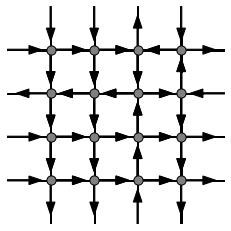

In [96]:
visualise_2d_model(arr,savefig=True,savename="Before Flipping")

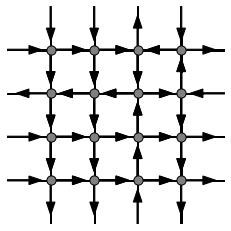

2
3


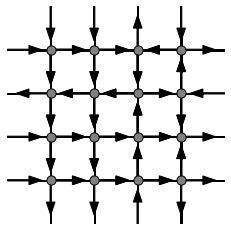

3
3


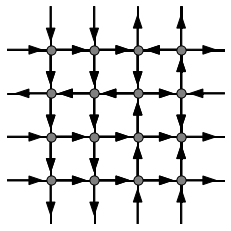

0
3


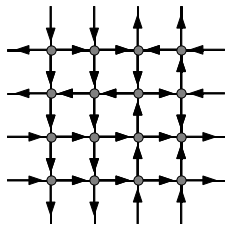

0
0


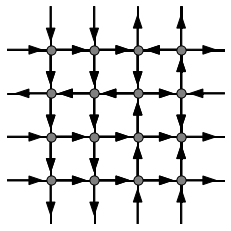

0
3


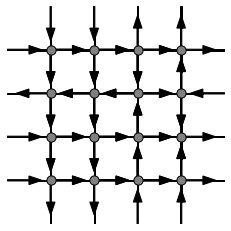

0
2


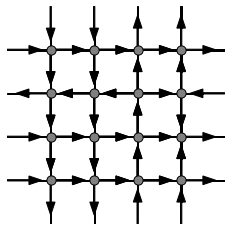

1
2


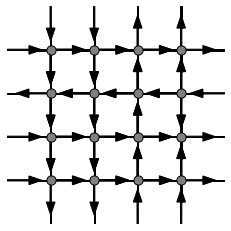

1
3


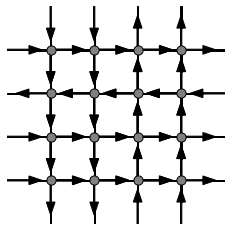

2
3
Completed in 9 iterations.


array([[[-1,  1],
        [-1,  1],
        [ 1,  1],
        [ 1,  1]],

       [[-1, -1],
        [-1, -1],
        [ 1, -1],
        [ 1, -1]],

       [[-1,  1],
        [-1,  1],
        [ 1,  1],
        [ 1,  1]],

       [[-1,  1],
        [-1,  1],
        [ 1,  1],
        [ 1,  1]]])

In [95]:
long_loop(arr,True)

In [14]:
arr = initialise_state(3)

In [17]:
def long_loop(arr2, verbose=False):
    '''
    Author: Team ℏ
    ~Function Description~
    '''
    arr = copy.deepcopy(arr2)
    N=len(arr)
    iters=0
    
    n1 = np.random.randint(low=0, high=N)
    n2 = np.random.randint(low=0, high=N)
    inital_pt =(n1,n2)
    prev_choice=None
    
    while True:
        iters+=1
        if n1==inital_pt[0] and n2==inital_pt[1] and iters!=1:
            if verbose:
                print(f"Completed in {iters} iterations.")
#             assert(check_config(arr))
            break
        current_up_state = arr[n1][n2][0]
        current_right_state = arr[n1][n2][1]

        lower_neighbour_up_state = arr[(n1+1)%N][n2][0]
        left_neighbour_right_state = arr[n1][n2-1][1]

        current_down_state = -(lower_neighbour_up_state)    
        current_left_state = -(left_neighbour_right_state)

        current_states_dict = {"up":current_up_state,"right":current_right_state,"down":current_down_state,"left":current_left_state}
        outgoing_state_dict={}
        incoming_state_dict={}

        for key in current_states_dict.keys():
            if current_states_dict[key]==1:  #current state is outgoing
                outgoing_state_dict[key]=current_states_dict[key]
            else:
                incoming_state_dict[key]=current_states_dict[key]

        if prev_choice =="right":
            forbidden_choice="left"
        if prev_choice =="up":
            forbidden_choice="down"
        if prev_choice =="left":
            forbidden_choice="right"
        if prev_choice =="down":
            forbidden_choice="up"
        else:
            forbidden_choice=None


        while True:
            out_choice = np.random.choice(list(outgoing_state_dict.keys()))
            if out_choice !=forbidden_choice:
                break

        prev_choice=out_choice

        if out_choice == "up":
            arr[n1][n2][0]= - (arr[n1][n2][0])
            n1=(n1-1)%N
            n2=n2
            continue

        if out_choice == "right":
            arr[n1][n2][1]= - (arr[n1][n2][1])
            n1=n1
            n2=(n2+1)%N
            continue

        if out_choice == "down":
            arr[(n1+1)%N][n2][0]= - (arr[(n1+1)%N][n2][0])
            n1=(n1+1)%N
            n2=n2
            continue

        if out_choice == "left":
            arr[n1][(n2-1)%N][1]= - (arr[n1][(n2-1)%N][1])
            n1=n1
            n2=(n2-1)%N
            continue



    return arr

In [24]:
arr = long_loop(arr)
arr

array([[[-1,  1],
        [ 1,  1],
        [ 1,  1]],

       [[-1, -1],
        [ 1, -1],
        [ 1, -1]],

       [[-1,  1],
        [ 1,  1],
        [ 1,  1]]])

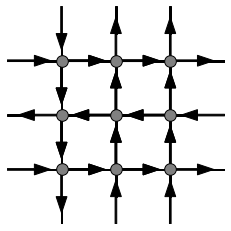

In [35]:
visualise_2d_model(arr,savefig=True,savename="Before Translation")

In [27]:
def get_all_row_translations(arr):
    '''
    Author: Siddharth Chaini
    ~Function Description~
    '''
    result_arr_list=[]
    N=len(arr) 
    for i in range(1,N):
        a1 = arr[0:i,:].reshape(-1,N,2)
        a2 = arr[i:,:].reshape(-1,N,2)
        res = np.vstack([a2,a1])
        result_arr_list.append(res)
    return result_arr_list

In [29]:
ls=get_all_row_translations(arr)

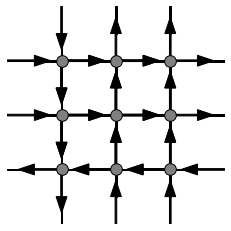

In [36]:
visualise_2d_model(ls[1],savefig=True,savename="After Translation")